# Чисельне інтегрування

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from random import uniform as RN

# Метод лівих прямокутників
def IntLeft(function,lim1,lim2,n):
    # function - підінтегральна функція
    # lim1 lim2 - межі інтегрування
    # n - кількість кроків
    # обчислимо крок інтегрування
    h=(lim2-lim1)/n
    # Підсумовуємо всі значення функції множені на відповідні коефіцієнти
    # та множимо суму на крок
    Int=h*np.sum(np.asarray([function(lim1+h*i) for i in range(n)]))
    return ('Left Riemann sum', Int)

# Метод правих прямокутників
def IntRight(function,lim1,lim2,n):
    # function - підінтегральна функція
    # lim1 lim2 - межі інтегрування
    # n - кількість кроків
    # обчислимо крок інтегрування
    h=(lim2-lim1)/n
    # Підсумовуємо всі значення функції множені на відповідні коефіцієнти
    # та множимо суму на крок
    Int=h*np.sum(np.asarray([function(lim1+h*i) for i in range(1,n+1)]))
    return ('Right Riemann sum', Int)

def Trap(function,lim1,lim2,n):
    # function - підінтегральна функція
    # lim1 lim2 - межі інтегрування
    # n - кількість кроків
    # обчислимо крок інтегрування
    h=(lim2-lim1)/n
    # Підсумовуємо всі значення функції множені на відповідні коефіцієнти
    # та множимо суму на крок
    Int=h*(np.sum(np.asarray([function(lim1+h*i) for i in range(1,n)]))+
           (function(lim1)+function(lim2))/2)
    return ('Trapezoidal rule', Int)

def Simpson(function,lim1,lim2,n):
    # function - підінтегральна функція
    # lim1 lim2 - межі інтегрування
    # n - кількість кроків
    # обчислимо крок інтегрування
    h=(lim2-lim1)/n
    # Підсумовуємо всі значення функції множені на відповідні коефіцієнти
    # та множимо суму на крок
    Int=h/3*(function(lim1)+function(lim2)+
             np.sum(np.asarray([function(lim1+h*i) for i in range(1,n,2)]))*4+
             np.sum(np.asarray([function(lim1+h*i) for i in range(2,n,2)]))*2
           )
    return ('Simpson\'s rule', Int)

def MonteCarlo(function,lim1,lim2,N):
    # function - підінтегральна функція
    # lim1 lim2 - межі інтегрування
    # N - кількість точок, які генеруємо
    h=0.001
    n=round((lim2-lim1)/h)
    Y=[function(lim1+h*i) for i in range(n+1)]
    # Площа прямокутника, що обмежує функцію
    maxY=max(Y)
    Ssq=(lim2-lim1)*maxY
    Counter=0
    for i in range(N):
        x=np.random.randint(0,n+1)
        if RN(0,maxY)<Y[x]:
            Counter+=1
    Int=Counter/N*Ssq
    return('Monte Carlo integration', Int)

def FindIntegral(function,lim1,lim2,n,N):
    for method in [IntLeft,IntRight,Trap,Simpson]:
        print(method(function,lim1,lim2,n)[0]+': Integral ='+str(method(function,lim1,lim2,n)[1]))
    print(MonteCarlo(function,lim1,lim2,N)[0]+': Integral ='+str(MonteCarlo(function,lim1,lim2,N)[1]))
    
def Error(method,function,lim1,lim2,Tochne,difsteps,difnumber):
    if not method==MonteCarlo:
        Err=[abs((method(function,lim1,lim2,difsteps[i])[1]-Tochne)/Tochne*100) for i in range(len(difsteps))]
        name=str(method(function,lim1,lim2,1)[0])
    else:
        I=[method(function,lim1,lim2,difnumber[i])[1] for i in range(len(difnumber))]
        Err=[abs((I[i]-Tochne)/Tochne*100) for i in range(len(difnumber))]
        name=str(method(function,lim1,lim2,1)[0])+str(I)
    return(Err,name)

def Errorh2(method,function,lim1,lim2,difsteps):
    Err=[]
    for i in range(len(difsteps)):
        Tochne=method(function,lim1,lim2,difsteps[i]*2)[1]
        Err+=[abs((method(function,lim1,lim2,difsteps[i])[1]-Tochne)/Tochne*100)]
    name=str(method(function,lim1,lim2,1)[0])
    return(Err,name)

def CompareErrors(function,lim1,lim2,Tochne,difsteps,difnumber):
    fig, a = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
    method=[IntLeft,IntRight,Trap,Simpson]
    for i in range(4):

        (y,name)=Error(method[i],function,lim1,lim2,Tochne,difsteps,difnumber)
        x=Errorh2(method[i],function,lim1,lim2,difsteps)[0]
        k=str(y[1]/x[1])
        a[i//2][i%2].plot(x,y)
        a[i//2][i%2].set_title(name+k)
        a[i//2][i%2].grid(True)
        a[i//2][i%2].set_xlabel('Error h2')
        a[i//2][i%2].set_ylabel('Error')

def AnalyzeError(f,lim1,lim2,Tochne,difsteps,difnumber):
    fig, a = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
    method=[IntLeft,IntRight,Trap,Simpson]
    for i in range(4):
        D=Error(method[i],f,lim1,lim2,Tochne,difsteps,difnumber)
        a[i//2][i%2].plot(difsteps,D[0])
        a[i//2][i%2].set_title(D[1])
        a[i//2][i%2].grid(True)
        a[i//2][i%2].set_xlabel('Step h')
        a[i//2][i%2].set_ylabel('Integration error')
    fig, b = plt.subplots(figsize=(6,6))
    D=Error(MonteCarlo,f,lim1,lim2,Tochne,difsteps,difnumber)
    b.plot(difnumber,D[0])
    b.set_title(D[1])
    b.grid(True)
    b.set_xlabel('Number of repeats N')
    b.set_ylabel('Integration error')

## Умова задачі
Варіант 12
Обчислити заданий у варіанті інтеграл обраним чисельним методом з похибкою,що має бути не більше за $10^{-5}$. Обґрунтувати вибір методу. Результат представити у вигляді
$Int\pm error$.
<br>
$$  \int_{0}^{1} \frac{sin(x)dx}{x\sqrt{x^2+x+1}} \,dx  $$
Значення інтегралу отриманий за допомогою Wolfram Alpha: 0.731849

In [15]:
def func(x):
    return math.sin(x)/(x * math.sqrt(x * x + x +1))
a, b = 0, 1
eps = 0.00001

In [11]:
FindIntegral(func, a + eps, b, 1000, 100000) # Ми змістили початкове значення на eps, адже інакше виникала помилка ділення на 0

Left Riemann sum: Integral =0.7320960458621123
Right Riemann sum: Integral =0.7315818795034505
Trapezoidal rule: Integral =0.7318389626827814
Simpson's rule: Integral =0.7318389557483754
Monte Carlo integration: Integral =0.730139047765212


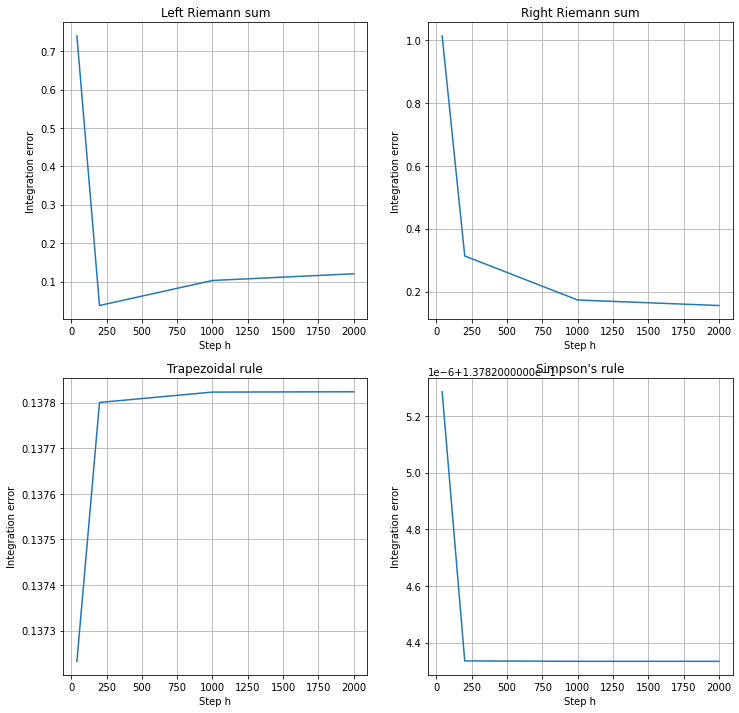

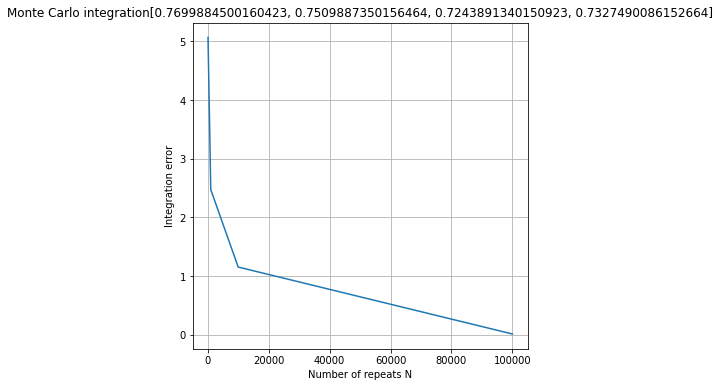

In [26]:
steps=[40,200,1000,2000]
numbers=[100,1000,10000,100000]
tochne=0.732849
AnalyzeError(func, a + eps, b, tochne, steps, numbers)

Згідно з графіками похибок можемо помітити, що найращі результати дає метод Сімсона при кількості кроків 200, похибка становить менше ніж $4\cdot10^{-6}$

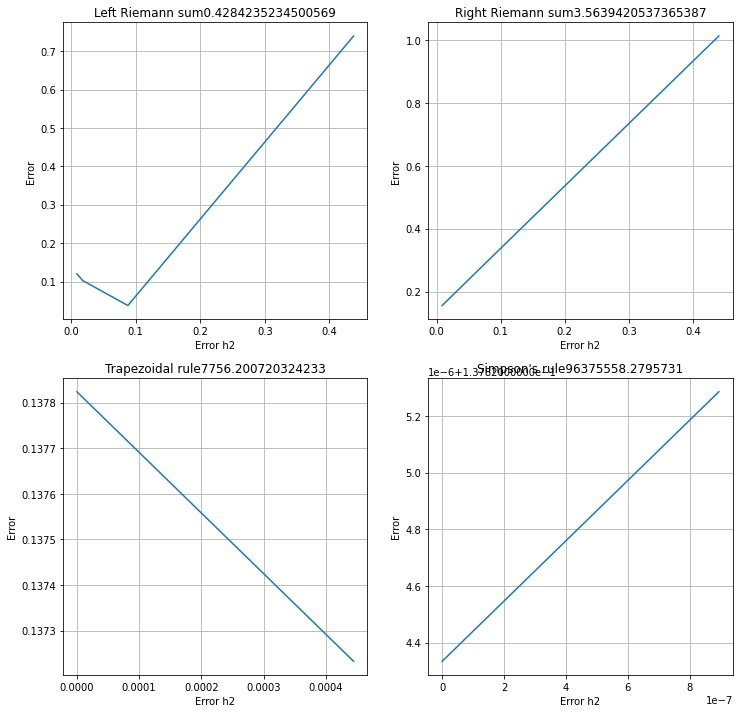

In [27]:
CompareErrors(func, a + eps, b, tochne, steps, numbers)

## Оцінка інтеграла методом Сімсона при 200 кроках

In [34]:
Er=Errorh2(Simpson, func, a + eps, b, [200])
Er

([1.4300756097144088e-09], "Simpson's rule")

In [35]:
Simpson(func, a + eps, b, 200)

("Simpson's rule", 0.7318389557372301)

Відповідь: $Int = 0.73184 \pm 1.43 \cdot 10^{-9}$